<a href="https://colab.research.google.com/github/LogicRick/mbyja-project-tests/blob/main/temp_rgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

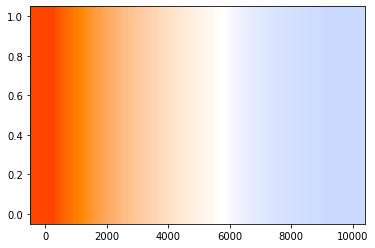

In [17]:
# Note:
# Red values below 6600 K are always 255.
# Blue values below 2000 K are always 0.
# Blue values above 6500 K are always 255.
# Using the formulas, the squared error is approx. 0.98.
import math
from matplotlib import pyplot as plt
def conversion_temp_rgb(temp_k):
    
### 1. Algorithm scope: Between 1000 and 40000.
    if temp_k < 1000: 
        temp_k = 1000
    elif temp_k > 40000:
        temp_k = 40000

    norm_temp = temp_k / 100.0 # Normalize data.
    
### Red values:
    if norm_temp <= 66:
        red = 255
    else:
        temp_red = 329.698727446 * math.pow(norm_temp - 60, -0.1332047592) # From Vendian.
        if temp_red < 0:
            red = 0
        elif temp_red > 255:
            red = 255
        else:
            red = temp_red
    
### Green values: 
    if norm_temp <= 66: # For purposes of fitting a curve to the data (squared error).
        temp_green = 99.4708025861 * math.log(norm_temp) - 161.1195681661 # From Vendian.
        if temp_green < 0:
            green = 0
        elif temp_green > 255:
            green = 255
        else:
            green = temp_green
    else:
        temp_green = 288.1221695283 * math.pow(norm_temp - 60, -0.0755148492) # From Vendian.
        if temp_green < 0:
            green = 0
        elif temp_green > 255:
            green = 255
        else:
            green = temp_green
    
### Blue values: 
    if norm_temp >= 66:
        blue = 255
    elif norm_temp <= 19:
        blue = 0
    else:
        temp_blue = 138.5177312231 * math.log(norm_temp - 10) - 305.0447927307 # From Vendian.
        if temp_blue < 0:
            blue = 0
        elif temp_blue > 255:
            blue = 255
        else:
            blue = temp_blue
    
    return red, green, blue
    
step_size = 100
for i in range(0, 10000, step_size):
    color = list(map(lambda div: div/255.0, conversion_temp_rgb(i))) + [1]
    plt.plot((i, i), (0, 1), linewidth=step_size/2.0, linestyle="-", color=color)

plt.show()  